# House Prices Project 🏠

## Project Overview

### Objective
This project builds an end-to-end **regression model** to predict a **continuous numerical value** that is the final sale price of residential properties. 

### Dataset & Challenge
The dataset is the well-known **Ames Housing dataset**, a popular and complex dataset with 79 explanatory features (e.g., `GrLivArea`, `OverallQual`, `Neighborhood`). The data includes a mix of numerical and categorical types, as well as significant missing values, providing a realistic data science challenge.

### Core Workflow
1.  **Exploratory Data Analysis (EDA):** Analyze the distribution of `SalePrice` (target) and its correlation with key features.
2.  **Feature Engineering:** Clean the data by imputing missing values, encoding categorical features, scaling numerical data, and creating new features (e.g., `TotalSqFt`).
3.  **Modeling:** Start with a `LinearRegression` baseline, then apply more advanced regressors like `RandomForestRegressor`, `Lasso Regression` and `GradientBoostingRegressor`.
4.  **Evaluation:** Measure model performance using **regression-specific metrics**, primarily **RMSE** (Root Mean Squared Error) and **R-squared ($R^2$)**, as "Accuracy" is not applicable here.
5.  **Feature Importance Analysis** determine which variables in the dataset were most influential in driving the model's prediction, validating its decisions and providing business insight

In [1]:
# Import libraries

import pandas as pd
import pyodide.http
import io
import piplite

await piplite.install('seaborn') 

# URL to download the House Prices dataset in CSV

url = 'https://raw.githubusercontent.com/Padre-Media/dataset/main/Ames.csv'

try:
    # Download the file using the 'pyfetch' method
    response = await pyodide.http.pyfetch(url)
    
    # Read the file content as text
    data = await response.string()
    
    # Use 'pandas' to read that text string as if it were a file. 'io.StringIO' transforms a string into a fictitious file
    df = pd.read_csv(io.StringIO(data))
    
    print("Housing Prices Dataset succesfully loaded!")

except Exception as e:
    print(f"Error Loading Dataset")
    print(e)
    print("\nMake sure you are connected to the internet and that your environment can access GitHub")

Housing Prices Dataset succesfully loaded!


# 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the initial investigation of data to discover patterns, spot anomalies, and check assumptions. In this section, there will be addressed two critical tasks:

* **Feature Investigation:** Visualizing and obtaining information on all x features and y target.
* **Target Analysis:** Visualizing the distribution of `SalePrice`. We expect to see a right-skewed distribution (common in financial data), which will require normalization (Log-transformation) to improve model performance.
* **Missing Data Audit:** Identifying which features contain null values and determining if they represent missing information or simply the absence of a facility (e.g., a missing value in `PoolQC` likely means "No Pool").

This analysis provides the roadmap for subsequent data cleaning and feature engineering steps.

In [2]:
# Feature Investigation: Display the first 5 rows of the dataframe

pd.set_option('display.max_columns', None)
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Latitude,Longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,42.044554,-93.631818


In [3]:
# Feature Investigation: Obtain information about the data

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2117 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2579 non-null   object 
 10  LandContour    2579 non-null   object 
 11  Utilities      2579 non-null   object 
 12  LotConfig      2579 non-null   object 
 13  LandSlope      2579 non-null   object 
 14  Neighborhood   2579 non-null   object 
 15  Condition1     2579 non-null   object 
 16  Condition2     2579 non-null   object 
 17  BldgType       2579 non-null   object 
 18  HouseSty

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GeoRefNo,Latitude,Longitude
count,2.579000e+03,2579.000000,2579.000000,2579.000000,2117.000000,2579.000000,2579.00000,2579.000000,2579.000000,2579.000000,2565.000000,2578.000000,2578.000000,2578.000000,2578.000000,2579.000000,2579.000000,2579.000000,2577.000000,2577.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2450.000000,2578.000000,2578.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.559000e+03,2482.000000,2482.000000
mean,7.147546e+08,1485.950368,178053.442420,57.694843,68.510628,10119.269484,6.04653,5.618457,1970.325708,1983.765025,99.346979,444.285105,53.259503,539.194725,1036.739333,1144.982939,336.721210,4.246219,0.435390,0.062088,1.550989,0.378054,2.850717,1.040326,6.386972,0.604110,1976.997143,1.747867,466.864624,95.956960,46.103141,23.223342,2.512214,16.162854,1.662660,48.750291,6.152385,2007.839085,7.136762e+08,42.034556,-93.642535
std,1.886603e+08,488.723768,75044.983207,42.810137,22.839861,8128.389882,1.36770,1.122200,29.719469,20.483428,175.895686,429.407015,174.454606,425.255818,418.628083,376.031658,424.124904,44.412136,0.518857,0.244557,0.545823,0.499184,0.822852,0.202588,1.535436,0.648683,24.653507,0.738674,207.514072,129.063212,66.067238,64.118627,25.298791,56.803807,30.345262,498.820852,2.669913,1.312088,1.886281e+08,0.018058,0.026029
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,5.263011e+08,41.986495,-93.692701
25%,5.313630e+08,1112.000000,129950.000000,20.000000,57.000000,7406.500000,5.00000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,5.284891e+08,42.022247,-93.660716
50%,5.354542e+08,1436.000000,159900.000000,50.000000,68.000000,9382.000000,6.00000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.500000,1070.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,5.354532e+08,42.034817,-93.640388
75%,9.071806e+08,1733.000000,209750.000000,70.000000,80.000000,11485.500000,7.00000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.750000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.071780e+08,42.049065,-93.621691
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,1.007100e+09,42.063342,-93.578327


Matplotlib is building the font cache; this may take a moment.


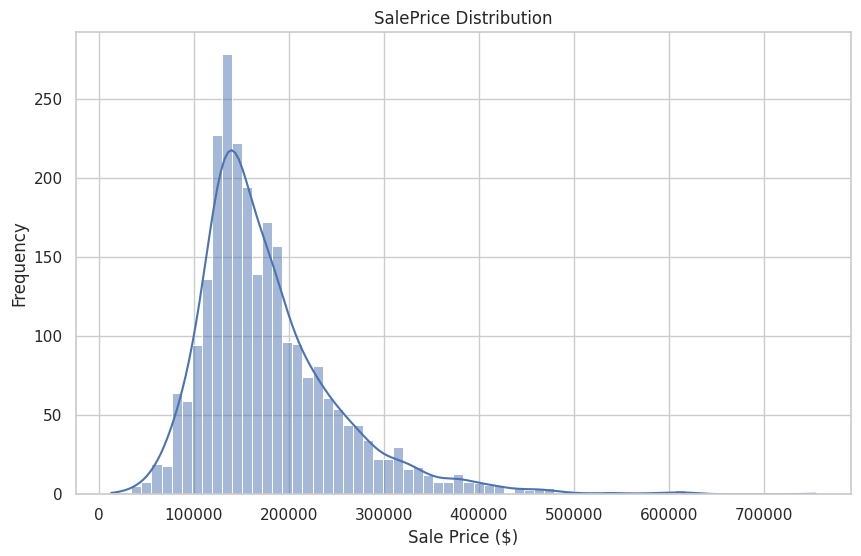

In [4]:
# Target Analysis: Import libraries and show Target Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a histogram of the “SalePrice” column kde=True adds a density estimate line

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=70)
plt.title('SalePrice Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

Percentage of Missing Data per Column:
PoolQC          99.651028
MiscFeature     96.238852
Alley           93.485847
Fence           79.643273
MasVnrType      60.953858
FireplaceQu     48.119426
LotFrontage     17.913920
GarageCond       5.001939
GarageQual       5.001939
GarageFinish     5.001939
GarageYrBlt      5.001939
GarageType       4.924389
Latitude         3.761148
Longitude        3.761148
BsmtExposure     2.753005
BsmtFinType2     2.714230
BsmtFinType1     2.675456
BsmtQual         2.675456
BsmtCond         2.675456
Prop_Addr        0.775494
GeoRefNo         0.775494
MasVnrArea       0.542846
BsmtFullBath     0.077549
BsmtHalfBath     0.077549
Electrical       0.038775
GarageArea       0.038775
GarageCars       0.038775
BsmtFinSF2       0.038775
BsmtUnfSF        0.038775
TotalBsmtSF      0.038775
BsmtFinSF1       0.038775
dtype: float64


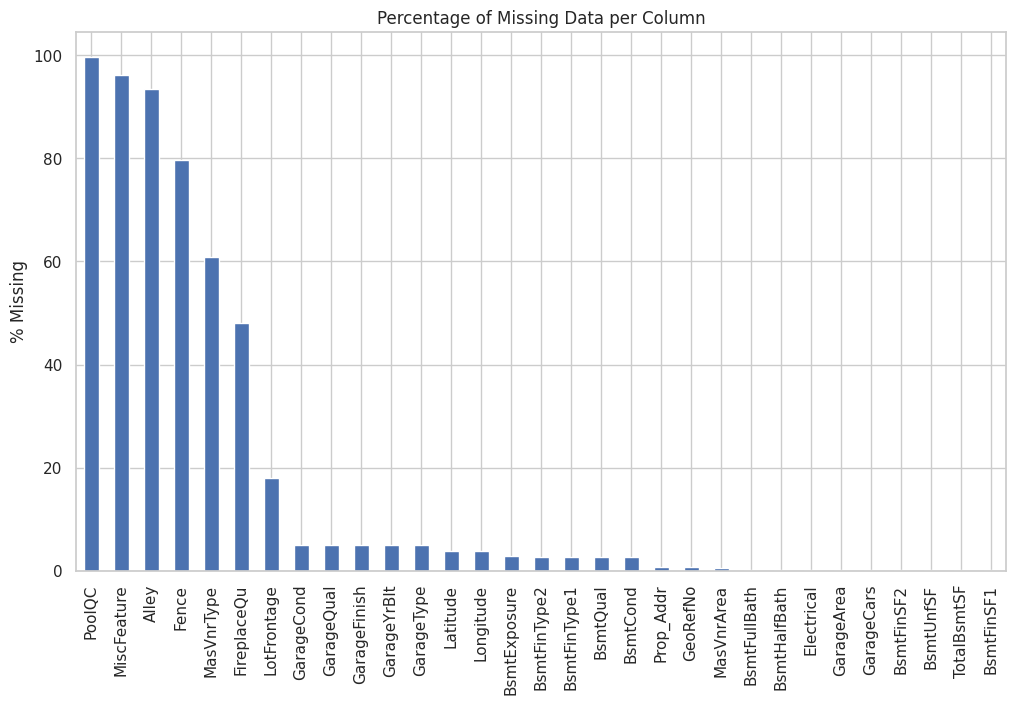

In [5]:
# Missing Data Audit: Calculate the percentage of missing values per column

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Filter only columns that have AT LEAST one missing value

missing_percent = missing_percent[missing_percent > 0]

# Sort from most problematic to least problematic

missing_percent.sort_values(ascending=False, inplace=True)

# Print Result

print("Percentage of Missing Data per Column:")
print(missing_percent)

# Plot

plt.figure(figsize=(12, 7))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Data per Column')
plt.ylabel('% Missing')
plt.show()

# 2. Data Preparation

### Normalization of Target Distribution

Process of mathematically transforming a highly skewed target variable (like SalePrice) to a more **symmetrical, bell-shaped distribution**. 
It was applied to SalePrice via a Log Transformation to **stabilize the variance** and satisfy the assumptions of linear models, preventing high-value outliers from disproportionately influencing the regression coefficients.

### Missing Data Management

Techniques used to either remove data points or estimate (impute) null values in a dataset. 
It was applied to the house price data by using different strategies based on domain knowledge:

* **`Categorical features`** where NaN meant "not present" (e.g., PoolQC), values were imputed with the string "None".
* **`Numerical data`** where NaN meant "unknown" (e.g., LotFrontage), values were imputed using statistical measures (like the median) and grouped by Neighborhood to ensure local accuracy.

### Feature Engineering

Process of using domain knowledge to derive new, high-impact variables from existing columns. 
This was applied to the housing data by combining individual features into aggregate metrics:

* **`TotalSqFt`**: Combines basement and above-ground living areas to represent the true size of the property.
* **`HouseAge`**: Calculates the age of the home at the time of sale (`YrSold` - `YearBuilt`), which is more informative than just the construction year.
* **`TotalBath`**: Aggregates full and half bathrooms (both above and below ground) into a single "Total Bathrooms" metric.

By explicitly defining these relationships, the model could better identify patterns that correlate strongly with `SalePrice`.

### Encoding

Encoding transforms categorical (text) variables into a numerical format that machine learning models can process.

- **`Ordinal Encoding`**: where categories with an inherent rank (e.g., Good, Average) are mapped to integers (e.g., 3, 2).
- **`One Hot Encoding`**: where nominal categories (e.g., Neighborhood) are converted into binary columns (0s and 1s) to eliminate false assumptions of order or magnitude.

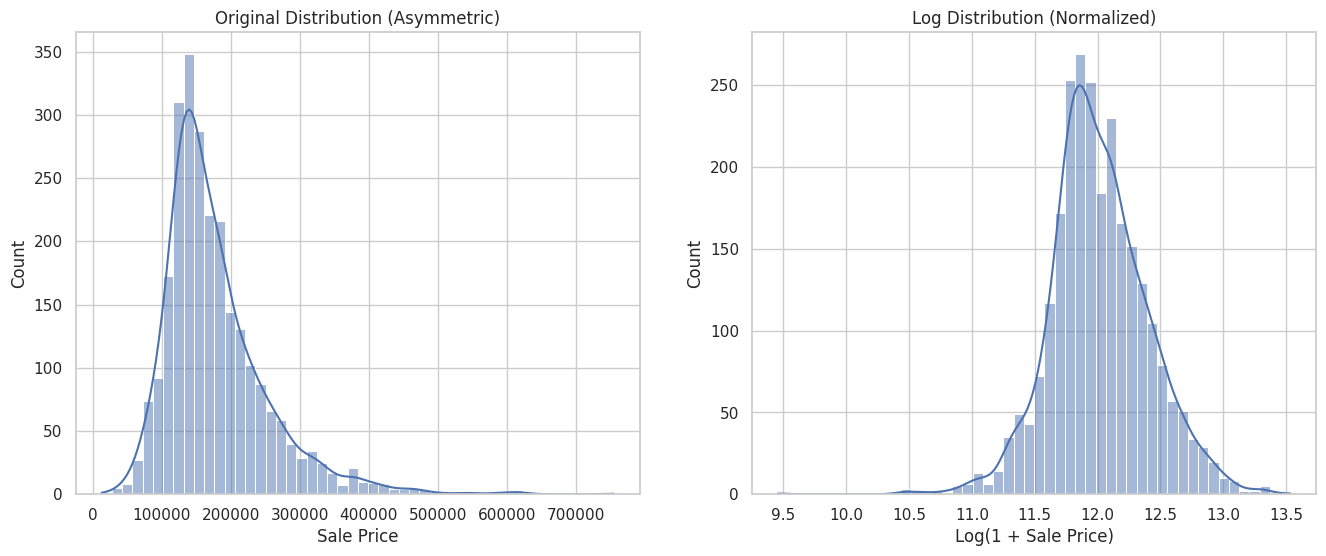

In [6]:
# Normalization of Target Distribution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation (log(1+x)) to get rid of the right tail (super expensive houses)

df['SalePrice_Log'] = np.log1p(df['SalePrice'])

# Visualize

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original Distribution

sns.histplot(df['SalePrice'], kde=True, bins=50, ax=ax1)
ax1.set_title('Original Distribution (Asymmetric)')

ax1.set_xlabel('Sale Price')

# Log Distribution
sns.histplot(df['SalePrice_Log'], kde=True, bins=50, ax=ax2)
ax2.set_title('Log Distribution (Normalized)')
ax2.set_xlabel('Log(1 + Sale Price)')

plt.show()

In [7]:
# Missing Data Management: Delete irrelevant and almost empty features
 
all_columns_to_drop = ['Order', 'PID', 'MiscFeature', 'Prop_Addr', 'GeoRefNo']

# To prevent Key Error (elimination double run) check still existing columns

columns_that_still_exist = [col for col in all_columns_to_drop if col in df.columns]

# Drop columns

if columns_that_still_exist:
    df = df.drop(columns=columns_that_still_exist)
    print(f"Deleted: {columns_that_still_exist}")
else:
    print("Nothing to delete")

Deleted: ['PID', 'MiscFeature', 'Prop_Addr', 'GeoRefNo']


In [8]:
# Missing Data Management: List of categorical features to fill with "None"

cols_fill_none = [
    'Alley',          # Type of alley access
    'BsmtQual',       # Basement quality
    'BsmtCond',       # Basement condition
    'BsmtExposure',   # Basement exposure
    'BsmtFinType1',   # Basement finish type 1
    'BsmtFinType2',   # Basement finish type 2
    'FireplaceQu',    # Fireplace quality
    'GarageType',     # Garage type
    'GarageFinish',   # Garage interior finish
    'GarageQual',     # Garage quality
    'GarageCond',     # Garage condition
    'PoolQC',         # Pool quality
    'Fence',          # Fence quality
    'MasVnrType'      # Masonry veneer type
]

# Apply the imputation
df[cols_fill_none] = df[cols_fill_none].fillna("None")

print(f"Filled NaN in {len(cols_fill_none)} categorical columns with 'None'.")

Filled NaN in 14 categorical columns with 'None'.


In [9]:
# Missing Data Management: List of numerical features to fill with 0

cols_fill_zero = [
    'MasVnrArea',     # Masonry veneer area
    'GarageYrBlt',    # Year garage was built (0 if no garage)
    'GarageArea',     # Area of garage
    'GarageCars',     # Size of garage in car capacity
    'BsmtFinSF1',     # Type 1 finished square feet
    'BsmtFinSF2',     # Type 2 finished square feet
    'BsmtUnfSF',      # Unfinished square feet of basement area
    'TotalBsmtSF',    # Total square feet of basement area
    'BsmtFullBath',   # Basement full bathrooms
    'BsmtHalfBath'    # Basement half bathrooms
]

# Apply the imputation
df[cols_fill_zero] = df[cols_fill_zero].fillna(0)

print(f"Filled NaN in {len(cols_fill_zero)} numerical columns with 0.")

Filled NaN in 10 numerical columns with 0.


In [10]:
# Missing Data Management: Calculate the percentage of missing values per column

missing_data_after = df.isnull().sum()
missing_percent_after = (missing_data_after / len(df)) * 100

# Filter only columns that still have missing values

missing_percent_after = missing_percent_after[missing_percent_after > 0]

# Sort from most problematic to least

missing_percent_after.sort_values(ascending=False, inplace=True)

# Print the result

if len(missing_percent_after) == 0:
    print("Fantastic! No more missing data.")
else:
    print("Remaining missing data to handle:")
    print()
    print(missing_percent_after)

Remaining missing data to handle:

LotFrontage    17.913920
Latitude        3.761148
Longitude       3.761148
Electrical      0.038775
dtype: float64


In [11]:
# Missing Data Management: Electrical Missing Data
# Since the column does not contain numerical values but categorical ones, replace the few missing data with the mode.

electrical_mode = df['Electrical'].mode()[0]

print(f"The most common type of electrical system is: '{electrical_mode}'")

# Missing Data replacement
df['Electrical'] = df['Electrical'].fillna(electrical_mode)

# Check
count_nan = df['Electrical'].isnull().sum()
print(f": Missing Data {count_nan}")

The most common type of electrical system is: 'SBrkr'
: Missing Data 0


In [12]:
# Missing Data Management: LotFrontage Missing Data
# Calculate Median for each Neighborood and replace values
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Neighborhood')['LotFrontage'].transform('median'))

# Check
count_nan = df['LotFrontage'].isnull().sum()
print(f"Missing Data: {count_nan}")

Missing Data: 3


In [13]:
# Missing Data Management: Manage LotFrontage with no reference with df Median

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Check
count_nan = df['LotFrontage'].isnull().sum()
print(f"Missing Data: {count_nan}")

Missing Data: 0


In [14]:
# Missing Data Management: Latitude and Longitude Missing Data
# Calculate Median for each Neighborood and replace values

cols_geo = ['Latitude', 'Longitude']

for col in cols_geo:

    df[col] = df[col].fillna(df.groupby('Neighborhood')[col].transform('median'))
    
    # If there's neighboroods with no coordinates replace with Global Median
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Final Check

missing_final = df.isnull().sum().sum()

if missing_final == 0:
    print("✅ Clean Dataset. 0 missing values")
else:
    print(f"⚠️ Attention: {missing_final} missing values.")
    print(df.isnull().sum()[df.isnull().sum() > 0])

✅ Clean Dataset. 0 missing values


In [15]:
# Feature Engineering: New Features
# 'TotalSqFt': ground living area + basement area
df['TotalSqFt'] = df['GrLivArea'] + df['TotalBsmtSF']

# 'HouseAge': age of the house at the sale moment
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['HouseAge'] = df['HouseAge'].apply(lambda x: 0 if x < 0 else x)

# 'TotalBath': normalize and sum full bathrooms (1) and half-bathroom (0.5)
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

print("New Features: TotalSqFt, HouseAge, TotalBath.")

New Features: TotalSqFt, HouseAge, TotalBath.


In [16]:
# Encoding: Ordinal Encoding (Standard Quality Columns)
# Standard Map for Quality Columns
quality_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0
}

# Quality Columns List
quality_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
    'GarageCond', 'PoolQC'
]

# Apply Map
for col in quality_cols:
    df[col] = df[col].map(quality_map)

df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
    'GarageCond', 'PoolQC']].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,3,3,3,3,3,4,3,3,0
1,4,3,4,3,3,4,0,3,3,0
2,4,3,3,3,5,4,0,3,1,0
3,4,4,2,3,4,3,0,3,3,0
4,4,3,4,3,5,4,0,3,3,0


In [17]:
# Encoding: Ordinal Encoding (Specific Quality Columns)

# BsmtExposure Map
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})

# BsmtFinType1 and BsmtFinType2 Map
fin_type_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
df['BsmtFinType1'] = df['BsmtFinType1'].map(fin_type_map)
df['BsmtFinType2'] = df['BsmtFinType2'].map(fin_type_map)

# GarageFinish Map
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})

# PavedDrive Map
df['PavedDrive'] = df['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})

# Fence Map
fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}
df['Fence'] = df['Fence'].map(fence_map)

df[['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'PavedDrive', 'Fence']].head()

,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish,PavedDrive,Fence
0,1,3,1,1,2,0
1,2,6,5,3,2,0
2,1,5,1,1,0,0
3,1,1,1,1,0,0
4,1,6,1,3,2,0


In [18]:
# Encoding: One Hot Encoding

import pandas as pd

# Identify remaining category columns

nominal_cols = df.select_dtypes(include=['object']).columns

print(f"{len(nominal_cols)} category columns")
print(nominal_cols.tolist())
print("-" * 30)

# Apply pd.get_dummies() to update df with the new columns and remove the original columns. Auto drop first columns to avoid multicollinearity

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print("One-Hot Encoding completato.")

# Check
remaining_objects = df.select_dtypes(include=['object']).shape[1]
print(f"'object' column remaining: {remaining_objects}")

df.filter(regex='Neighborhood').head()

26 category columns
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']
------------------------------
One-Hot Encoding completato.
'object' column remaining: 0


,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Model Training & Selection

With data fully scaled and prepared, this phase focuses on training various regression algorithms to predict the target variable, `SalePrice_Log`.

The strategy is to benchmark performance across a diverse set of models:

* **Baseline:** Standard **Linear Regression**.
* **Regularized Models:** **Lasso** and **Ridge Regression**, crucial for handling the high number of features created during One-Hot Encoding.
* **Advanced Ensembles:** **Random Forest Regressor** and **XGBoost Regressor** (often providing the best out-of-the-box accuracy for tabular data).

Model performance will be rigorously assessed using **Root Mean Squared Error (RMSE)**—to measure prediction error in dollar terms—and the **R-squared ($R^2$)** score. 

The best model will then be selected for hyperparameter tuning.

In [19]:
# Data Standardization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define Features (X) e Target (y)

X = df.drop(columns=['SalePrice', 'SalePrice_Log'])
y = df['SalePrice_Log']

# Train/Test Split (test_size 20%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Apply StandardScaler (Avg = 0, St.Dev = 1)
scaler = StandardScaler()

# Train and transform scaler only on X_train to prevent Data Leakage

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("\nStandardization Completed")

X_train: (2063, 215)
X_test: (516, 215)

Standardization Completed


In [20]:
# Training and Forecast Baseline: Standard Linear Regression

from sklearn.linear_model import LinearRegression
import numpy as np

slr_model = LinearRegression()
slr_model.fit(X_train_scaled, y_train)

# log forecasts

slr_predictions_log = slr_model.predict(X_test_scaled)

print("LinearRegression model trained and predictions successfully generated.")

# Reverse-Transform: log to $ (exponential function np)

slr_predictions_dollars = np.expm1(slr_predictions_log)

# Also for y_test

y_test_dollars = np.expm1(y_test)

print()
print("Reverse transformation completed. Forecasts Y and actual values y are in $.")

LinearRegression model trained and predictions successfully generated.

Reverse transformation completed. Forecasts Y and actual values y are in $.


In [23]:
# SLR Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# RMSE (Root Mean Squared Error)

slr_rmse = np.sqrt(mean_squared_error(y_test_dollars, slr_predictions_dollars))

# R-squared
slr_r2 = r2_score(y_test_dollars, slr_predictions_dollars)

print(f"\nLinear Regression Results:")
print("-" * 30)
print(f"SLR RMSE: ${slr_rmse:,.2f}")
print(f"SLR R-squared: {slr_r2:.4f}")


Linear Regression Results:
------------------------------
SLR RMSE: $21,943.75
SLR R-squared: 0.9211


In [24]:
# Training, Forecast and Evaluation: Lasso (Least Absolute Shrinkage and Selection Operator)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Start with alpha = 0.001 (standard), then fix it through fine tuning

lasso_model = Lasso(alpha=0.001, random_state=42, max_iter=5000) 

lasso_model.fit(X_train_scaled, y_train)

# log forecasts

predictions_log_lasso = lasso_model.predict(X_test_scaled)

# Reverse-Transform forecasts

predictions_dollars_lasso = np.expm1(predictions_log_lasso)

y_test_dollars = np.expm1(y_test) # Just in case of single running code cell, reverse-transform again y_test

# Model Evaluation

rmse_lasso = np.sqrt(mean_squared_error(y_test_dollars, predictions_dollars_lasso))
r2_lasso = r2_score(y_test_dollars, predictions_dollars_lasso)

print("\nLasso Regression (Baseline Alpha) Results:")
print("-" * 30)
print(f"RMSE Lasso: ${rmse_lasso:,.2f}")
print(f"R-squared Lasso: {r2_lasso:.4f}")


Lasso Regression (Baseline Alpha) Results:
------------------------------
RMSE Lasso: $20,983.34
R-squared Lasso: 0.9278


In [27]:
# Training, Forecast and Evaluation: Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) 

rf_model.fit(X_train_scaled, y_train)

# log forecasts

predictions_log_rf = rf_model.predict(X_test_scaled)

# Reverse-Transform forecasts

predictions_dollars_rf = np.expm1(predictions_log_rf)
y_test_dollars = np.expm1(y_test) # Just in case of single running code cell, reverse-transform again y_test

# Model Evaluation

rmse_rf = np.sqrt(mean_squared_error(y_test_dollars, predictions_dollars_rf))
r2_rf = r2_score(y_test_dollars, predictions_dollars_rf)

print("\nRandom Forest Regression Results:")
print("-" * 30)
print(f"RMSE RF: ${rmse_rf:,.2f}")
print(f"R-squared RF: {r2_rf:.4f}")


Random Forest Regression Results:
------------------------------
RMSE RF: $24,500.84
R-squared RF: 0.9016


In [26]:
# Training, Forecast and Evaluation: XGBoost (eXtreme Gradient Boosting)

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42, 
    n_jobs=-1
) 

xgb_model.fit(X_train_scaled, y_train)

# log forecasts

predictions_log_xgb = xgb_model.predict(X_test_scaled)

# Reverse-Transform forecasts

predictions_dollars_xgb = np.expm1(predictions_log_xgb)
y_test_dollars = np.expm1(y_test) 

# Model Evaluation

rmse_xgb = np.sqrt(mean_squared_error(y_test_dollars, predictions_dollars_xgb))
r2_xgb = r2_score(y_test_dollars, predictions_dollars_xgb)

print("\nXGBoost Regression Results:")
print("-" * 30)
print(f"RMSE XGBoost: ${rmse_xgb:,.2f}")
print(f"R-squared XGBoost: {r2_xgb:.4f}")


XGBoost Regression Results:
------------------------------
RMSE XGBoost: $22,535.00
R-squared XGBoost: 0.9168


## Analysis and Conclusion of the Modeling Phase

The comparative analysis across the four regression models yielded a clear outcome:

| Model | RMSE (Mean Error) | R-squared Score (Explained Variance) |
| :---: | :---: | :---: |
| Linear Regression (Baseline) | 21,943.75 Dollars | 0.9211 |
| **Lasso Regression** | **20,983.34 Dollars** | **0.9278** |
| Random Forest Regressor (RF) | 24,500.84 Dollars | 0.9016 
| XGBoost Regressor | 22,535.00 Dollars | 0.9168 

### The Winning Model: Lasso Regression

The **Lasso Regression** model achieved the **lowest RMSE**, with a mean prediction error of approximately **$20,983**. This result makes it our primary candidate for final optimization.

### Hypothesis: Why Lasso Won

The superiority of the Lasso model is crucial; it validates the importance of **regularization** and **feature selection** in handling high-dimensional data (due to One-Hot Encoding).

1.  **Too Many Features:** Our engineered dataset contains hundreds of dummy variables, many of which are pure noise.
2.  **Lasso's $L1$ Power:** Lasso's $L1$ penalty forces the coefficients of these irrelevant features to become **exactly zero**. This successfully pruned the model, reducing noise and complexity, which ultimately allowed Lasso to generalize better than the more complex Ensemble models (RF, XGBoost), which likely overfitted the sparse dummy features.

## Hyperparameter Tuning

Now we must optimize our winning Lasso model. The current performance was achieved using initial (baseline) parameter guesses.

### 1. The Goal: Finding the Optimal `alpha`

Lasso Regression has one critical hyperparameter: **`alpha`** (the regularization strength).

* `alpha` controls the penalty. We need to find the value that perfectly balances bias and variance:
    * $\alpha$ too low $\rightarrow$ High risk of overfitting.
    * $\alpha$ too high $\rightarrow$ Model becomes too simple (underfitting), driving important coefficients to zero.

### 2. The Method: Grid Search with Cross-Validation (CV)

We will use **Grid Search** combined with **Cross-Validation** to systematically test a range of `alpha` values and find the optimal parameter.

* **Grid Search:** We will define a list (a "grid") of potential $\alpha$ values to explore (e.g., from 0.0001 to 10).
* **Cross-Validation:** For every $\alpha$ tested, the training data will be split into $k$ folds (e.g., $k=5$). The model is trained $k$ times, ensuring that the final performance metric (RMSE) is robust and not specific to a single random data split.

The result will be the single best $\alpha$ value that yields the lowest average $\text{RMSE}$ across all cross-validation folds.
  

In [ ]:
# Alpha Optimization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

# Define Alpha Values Range

alpha_range = np.logspace(-4, 2, 30) 
param_grid = {'alpha': alpha_range}

lasso = Lasso(random_state=42, max_iter=5000) 

# Grid Search with 5-Fold Cross-Validation (cv=5) Score = RMSE

grid_search = GridSearchCV(
    estimator=lasso, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5,
    n_jobs=-1, 
    verbose=1 
)

print("Starting Grid Search to find the optimal alpha...")
grid_search.fit(X_train_scaled, y_train)

# Extract Best Alpha

best_alpha = grid_search.best_params_['alpha']
best_score_neg_mse = grid_search.best_score_

# Convertiamo il miglior punteggio (MSE negativo) in RMSE

best_rmse_cv = np.sqrt(-best_score_neg_mse)

print("\n--- Grid Search Result ---")
print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best (log) RMSE (Cross-Validation): ${best_rmse_cv:.4f}")

In [28]:
# Tuned Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import numpy as np

best_alpha = 0.002807 

# Training

final_lasso_model = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)

final_lasso_model.fit(X_train_scaled, y_train)

# Forecasts and Reverse-Transformation

predictions_log_final = final_lasso_model.predict(X_test_scaled)
predictions_dollars_final = np.expm1(predictions_log_final)
y_test_dollars = np.expm1(y_test)

# Final Evaluation
rmse_final = np.sqrt(mean_squared_error(y_test_dollars, predictions_dollars_final))
r2_final = r2_score(y_test_dollars, predictions_dollars_final)

print("\n--- Final Tuned Lasso Evaluation ---")
print("-" * 55)
print(f"Best Alpha: {best_alpha:.6f}")
print(f"Final RMSE: ${rmse_final:,.2f}")
print(f"Final R-squared: {r2_final:.4f}")

# Baseline Comparison (alpha standard = 0.001)

baseline_rmse = 20983.34

if rmse_final < baseline_rmse:
    gain = baseline_rmse - rmse_final
    print(f"\n✅ GAIN: ${gain:,.2f} RMSE reduction compared to baseline model!")


--- Final Tuned Lasso Evaluation ---
-------------------------------------------------------
Best Alpha: 0.002807
Final RMSE: $21,316.18
Final R-squared: 0.9255


# Feature Importance Analysis

This final step assesses the **interpretability** of the winning **Lasso Regression** model.

For linear models like Lasso, feature importance is determined by the **magnitude (absolute value)** of the coefficient assigned to each feature. Since the data was scaled, it is possible to directly compare these values.

* **Coefficient Magnitude:** Indicates the strength of the feature's influence on the target variable. Coefficients near zero were automatically pruned by the Lasso model.
* **Coefficient Sign (+/-):** Indicates the direction of the influence on the log-transformed price (e.g., a positive coefficient for `TotalSqFt` means larger size increases the price).

The analysis confirms domain knowledge: the most significant predictors of price are **Overall Quality**, **Total Square Footage**, and specific **Neighborhood** locations. This outcome validates the entire preprocessing pipeline and confirms the model is both accurate and highly interpretable.

In [ ]:
# Top 10 Features

import pandas as pd
from sklearn.linear_model import Lasso
import numpy as np

best_alpha = 0.001

# Model Training

final_lasso_model = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)

final_lasso_model.fit(X_train_scaled, y_train)

# Extract Features and Coefficients

coefficients = final_lasso_model.coef_
feature_names = X_train.columns

# Feature Importance df for analysis

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("--- Lasso Model Top 10 Features ---")
print(feature_importance[['Feature', 'Coefficient']].head(10))